In [2]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc as pm   # type: ignore
import arviz as az   # type: ignore

In [3]:
data = pd.read_csv("EPE.csv")

##  `Image` saves the code of each of the 2221 eggs. The number before the hyphen represents the species code, and the number after the hyphen represents the individual code of an egg. 
# 1 and 2 represent Anas platyrhynchos domesticus, and Anser cygnoides domesticus; 5, 3, 4 and 7 represent Alectoris chukar domesticus, Coturnix japonica domesticus, Gallus gallus domesticus, and Phasianus colchicus domesticus.

# Add a column `Species` with the latin name of the species who produced the egg (see the description on the `Image` column of data).

#data[" Sepcie Code"], data["Individual Code"]= data['Image'].str.split('-', expand=True) 
data


,Image,scan.length,scan.width,scan.area,Albumen,Yolk,Shell
0,1-001,6.221473,4.540429,22.110017,41.3945,29.6658,8.4415
1,1-002,6.621715,4.163546,21.447135,37.1113,25.8654,8.1418
2,1-003,6.344160,4.528604,22.326449,42.9508,29.7898,8.1596
3,1-004,6.017742,4.563903,21.550142,39.4268,28.8630,7.9317
4,1-005,6.001429,4.403663,20.631756,40.9513,24.9595,7.8770
...,...,...,...,...,...,...,...
2216,7-385,4.500965,3.354001,11.573268,NaN,NaN,NaN
2217,7-386,4.372292,3.389678,11.269988,NaN,NaN,NaN
2218,7-387,4.421552,3.385283,11.417075,NaN,NaN,NaN
2219,7-389,4.180517,3.346545,10.691421,NaN,NaN,NaN


In [4]:
first = data["Image"][0:350]
second= data["Image"][351:711]
third = data["Image"][711:1087]
firth = data["Image"][1087:1464]
fifth = data["Image"][1464:1854] 
seventh = data["Image"][1854:]

for i in first:
    data.loc[data.Image== i, 'Specie'] = "Anas platyrhynchos domesticus"  #COOL but to fix 
for i in second:
    data.loc[data.Image== i, 'Specie'] = "Anser cygnoides domesticus" 
for i in third:
    data.loc[data.Image== i, 'Specie'] = "Coturnix japonica domesticus" 
for i in firth:
    data.loc[data.Image== i, 'Specie'] = "Gallus gallus domesticus" 
for i in fifth:
    data.loc[data.Image== i, 'Specie'] = "Alectoris chukar domesticus" 
for i in seventh:
    data.loc[data.Image== i, 'Specie'] = "Phasianus colchicus domesticus" 
data

,Image,scan.length,scan.width,scan.area,Albumen,Yolk,Shell,Specie
0,1-001,6.221473,4.540429,22.110017,41.3945,29.6658,8.4415,Anas platyrhynchos domesticus
1,1-002,6.621715,4.163546,21.447135,37.1113,25.8654,8.1418,Anas platyrhynchos domesticus
2,1-003,6.344160,4.528604,22.326449,42.9508,29.7898,8.1596,Anas platyrhynchos domesticus
3,1-004,6.017742,4.563903,21.550142,39.4268,28.8630,7.9317,Anas platyrhynchos domesticus
4,1-005,6.001429,4.403663,20.631756,40.9513,24.9595,7.8770,Anas platyrhynchos domesticus
...,...,...,...,...,...,...,...,...
2216,7-385,4.500965,3.354001,11.573268,NaN,NaN,NaN,Phasianus colchicus domesticus
2217,7-386,4.372292,3.389678,11.269988,NaN,NaN,NaN,Phasianus colchicus domesticus
2218,7-387,4.421552,3.385283,11.417075,NaN,NaN,NaN,Phasianus colchicus domesticus
2219,7-389,4.180517,3.346545,10.691421,NaN,NaN,NaN,Phasianus colchicus domesticus


In [5]:
### Exercise 3 

def ellipsoid_volume(a:int,b:int ,c:int ) -> float :
    V= 4/3 * np.pi * a*b*c
    return V

### Exercise 4 

def orthogonal (colb:int, colc:int) -> float:
    x= np.pi *colb/colc 
    return x 

data["x"]= data.apply(lambda x: orthogonal(x["scan.width"], x["scan.area"]), axis= 1)  #USEFUL: apply fun to multiple cols 

### Exercise 5 (max 5 points)

data['max'] = data[["scan.length","scan.width","x"]].max(axis=1)   #double brakets!! 
data

,Image,scan.length,scan.width,scan.area,Albumen,Yolk,Shell,Specie,x,max
0,1-001,6.221473,4.540429,22.110017,41.3945,29.6658,8.4415,Anas platyrhynchos domesticus,0.645145,6.221473
1,1-002,6.621715,4.163546,21.447135,37.1113,25.8654,8.1418,Anas platyrhynchos domesticus,0.609879,6.621715
2,1-003,6.344160,4.528604,22.326449,42.9508,29.7898,8.1596,Anas platyrhynchos domesticus,0.637228,6.344160
3,1-004,6.017742,4.563903,21.550142,39.4268,28.8630,7.9317,Anas platyrhynchos domesticus,0.665329,6.017742
4,1-005,6.001429,4.403663,20.631756,40.9513,24.9595,7.8770,Anas platyrhynchos domesticus,0.670545,6.001429
...,...,...,...,...,...,...,...,...,...,...
2216,7-385,4.500965,3.354001,11.573268,NaN,NaN,NaN,Phasianus colchicus domesticus,0.910452,4.500965
2217,7-386,4.372292,3.389678,11.269988,NaN,NaN,NaN,Phasianus colchicus domesticus,0.944898,4.372292
2218,7-387,4.421552,3.385283,11.417075,NaN,NaN,NaN,Phasianus colchicus domesticus,0.931515,4.421552
2219,7-389,4.180517,3.346545,10.691421,NaN,NaN,NaN,Phasianus colchicus domesticus,0.983357,4.180517


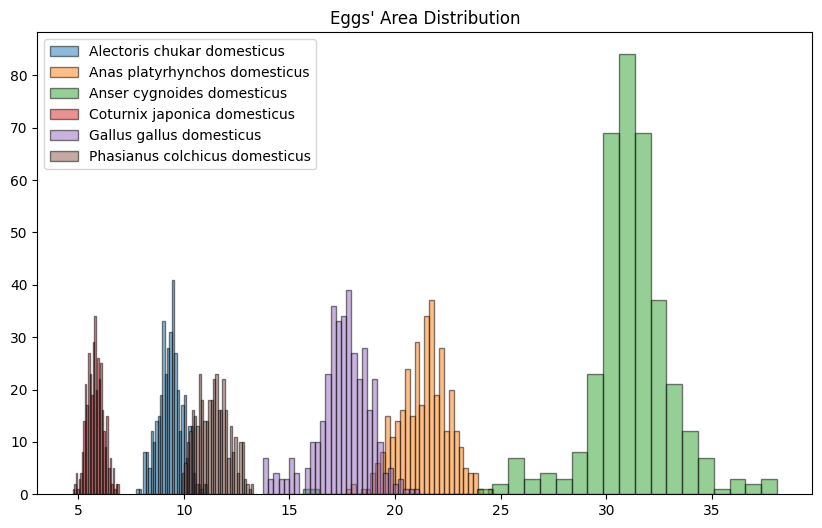

In [6]:
### Exercise 6 
# Plot together the histograms of `scan.area` for each species.

specie= data.groupby( "Specie")
plt.figure(figsize=(10, 6))

for (name, group) in specie:
    plt.hist(group['scan.area'], bins=30, alpha=0.5, label=name, edgecolor="black")   #USEFUL
    plt.legend()
    plt.title("Eggs' Area Distribution")


#maio

In [7]:
### Exercise 7 (max 6 points)

# Make a scatter plot with the volume  versus the sum of Yolk and Albumen. 
# Color the points according to the species. Pay attention to interpret correctly the numbers as axis or semi-axis.

data["sum"]= data["Albumen"] + data ["Yolk"]
data["Volume"]= data.apply(lambda x: ellipsoid_volume(x["scan.length"]/2, x["scan.width"]/2, x["x"]/2), axis=1 ) 
data

,Image,scan.length,scan.width,scan.area,Albumen,Yolk,Shell,Specie,x,max,sum,Volume
0,1-001,6.221473,4.540429,22.110017,41.3945,29.6658,8.4415,Anas platyrhynchos domesticus,0.645145,6.221473,71.0603,9.542153
1,1-002,6.621715,4.163546,21.447135,37.1113,25.8654,8.1418,Anas platyrhynchos domesticus,0.609879,6.621715,62.9767,8.803927
2,1-003,6.344160,4.528604,22.326449,42.9508,29.7898,8.1596,Anas platyrhynchos domesticus,0.637228,6.344160,72.7406,9.585875
3,1-004,6.017742,4.563903,21.550142,39.4268,28.8630,7.9317,Anas platyrhynchos domesticus,0.665329,6.017742,68.2898,9.567638
4,1-005,6.001429,4.403663,20.631756,40.9513,24.9595,7.8770,Anas platyrhynchos domesticus,0.670545,6.001429,65.9108,9.278871
...,...,...,...,...,...,...,...,...,...,...,...,...
2216,7-385,4.500965,3.354001,11.573268,NaN,NaN,NaN,Phasianus colchicus domesticus,0.910452,4.500965,NaN,7.196551
2217,7-386,4.372292,3.389678,11.269988,NaN,NaN,NaN,Phasianus colchicus domesticus,0.944898,4.372292,NaN,7.332484
2218,7-387,4.421552,3.385283,11.417075,NaN,NaN,NaN,Phasianus colchicus domesticus,0.931515,4.421552,NaN,7.300594
2219,7-389,4.180517,3.346545,10.691421,NaN,NaN,NaN,Phasianus colchicus domesticus,0.983357,4.180517,NaN,7.203382


Text(0.5, 1.0, "Eggs' V-Mass Ratio")

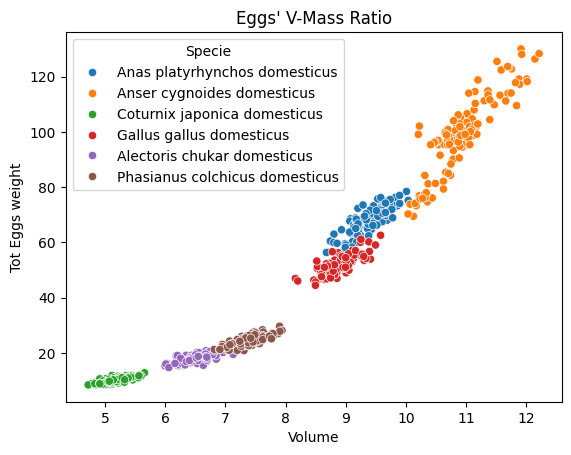

In [8]:
import seaborn as sns

sns.scatterplot(data=data, x='Volume', y='sum', hue='Specie')   #SUPER!!!!!! 
plt.xlabel ("Volume") 
plt.ylabel("Tot Eggs weight")
plt.title ("Eggs' V-Mass Ratio")


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, gamma]


Output()

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 1046 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


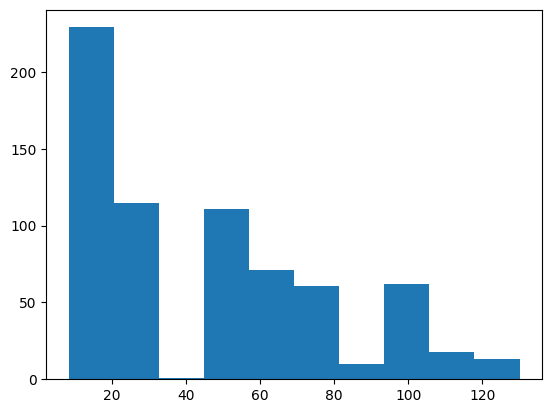

In [9]:
#Exercise 8 (max 4 points)
#
# Consider this statistical model:
# - the observed weight of `Albumen` together with `Yolk` is normally distributed with standard deviation $\gamma$ and a mean given by $\alpha + \beta \cdot V$ (where $V$ is the volume computed as in Exercise 7).
# - parameter $\alpha$ is normally distributed with $\mu = 0$ and $\sigma = 3$
# - parameter $\beta$ is normally distributed with $\mu = 0$ and $\sigma = 3$
# - parameter $\gamma$ is exponentially distributed with $\lambda = 1$

# Code this model with pymc and plot the summaries of the resulting estimation by using `az.plot_posterior`.

import pymc as pm

#clean data 
data = data.dropna(subset=['Albumen', 'Yolk'])  #use dropna and subset
plt.hist(data["sum"])

#Define the likelihood for the observed data weight_obs as normally distributed with mean mu and standard deviation gamma.
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=3)
    beta = pm.Normal('beta', mu=0, sigma=3)
    gamma = pm.Exponential('gamma', lam=1)  

    # Expected value of outcome
    mu = alpha + beta * data['Volume']  #sto stimando la distribuzione del V
 
    # Likelihood (sampling distribution) of observations
    weight_obs = pm.Normal('weight_obs', mu=mu, sigma=gamma, observed=data['sum'])

    # Draw samples
    trace = pm.sample(100)

# Plot the results


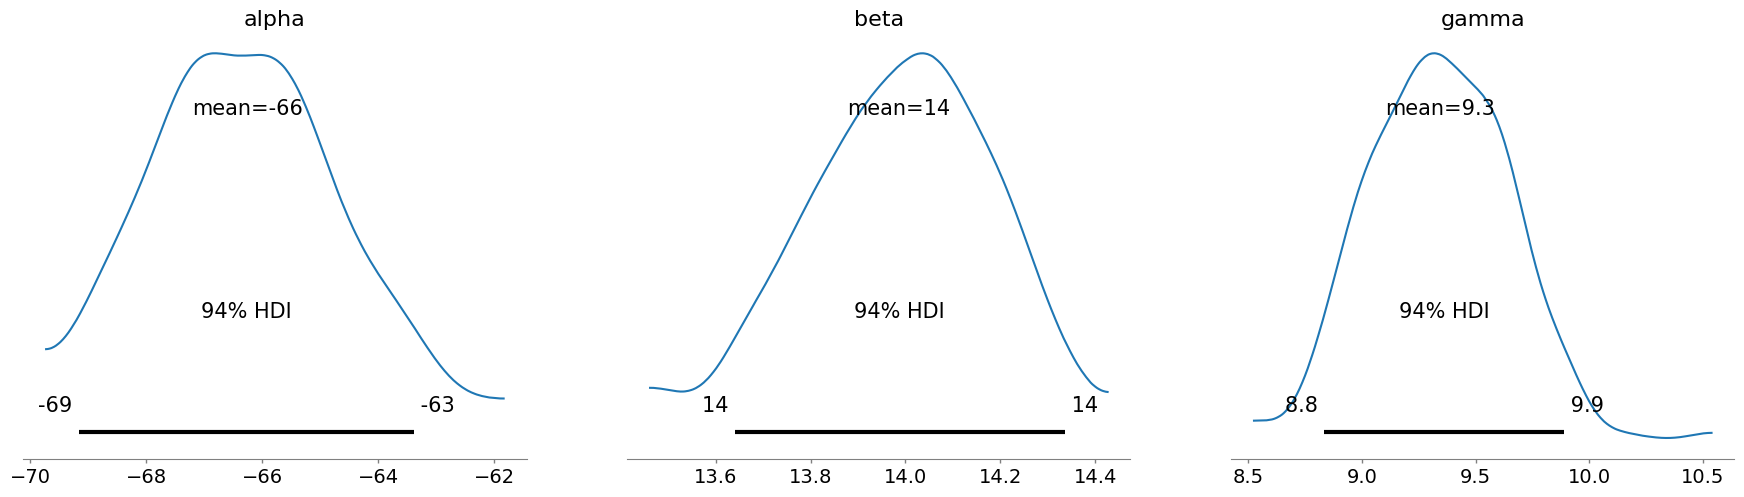

In [10]:
az.plot_posterior(trace)
plt.show()